#Comprehensive Data Analysis for Fictitious Online Bookstore

Nandini Gunda

11690004

Resources:

* https://towardsdatascience.com/how-to-structure-your-data-science-notebook-to-be-easy-to-follow-2d3c2777e6e0

# Introduction

## The Problem / Understanding the Context

The online bookstore aims to improve its overall business performance by leveraging data analytics to forecast future sales accurately. Accurate sales forecasting is crucial for optimizing inventory levels, reducing costs associated with overstock or stockouts, and enhancing the effectiveness of marketing campaigns. By understanding sales patterns and the impact of various factors such as promotions and seasonal trends, the bookstore can make informed decisions to drive growth.

## Main Goals

1. **Forecast Future Sales**:
Predict daily, weekly, and monthly sales to ensure optimal stock levels and marketing strategies.

2. **Optimize Inventory Management**: Reduce stockouts and overstock situations by aligning inventory with anticipated demand.

3. **Enhance Marketing Campaigns**: Tailor promotional activities based on predicted sales trends and seasonal variations.

## Questions to Address

1. What are the historical sales patterns and trends?

2. How do promotions and seasonal effects impact sales?

3. What is the accuracy of different sales forecasting models?

4. Which features most significantly influence sales?

5. How can sales forecasts improve inventory and marketing decisions?

## End Product

A sales forecasting model that predicts future sales with high accuracy, coupled with visualizations comparing forecasts to actual sales. The model should be easy to integrate into inventory and marketing decision-making processes.

## Prior Knowledge

1. **Time Series Analysis**: Understanding ARIMA, Prophet, LSTM, and XGBoost models.

2. **Feature Engineering**: Techniques to create meaningful features from raw data.
3. **Data Visualization**: Tools and methods to effectively visualize sales trends and forecast accuracy.
4. **Inventory Management**: Basic concepts of stock control and inventory optimization.

## Data Preparation

1. **Data Collection:**

    * Gather historical sales data, including daily, weekly, and monthly sales figures.

  * Collect data on promotions, seasonal effects, and other relevant factors.

2. **Data Cleaning**:

    * Identify and handle missing values and outliers.

    * Ensure data consistency and accuracy.

3. **Feature Engineering**:

    * Create features such as moving averages, lagged variables, and promotional periods.

4. **Data Splitting**:

   * Divide the dataset into training and testing sets for model validation.

## Fields and Meanings

1. BookID: Unique identifier for each book.

2. marketing_campaign: Used to analyze the impact of marketing campaigns on sales.
3. BookTitle: Title of the book.
4. Season: The season when sales occurred (e.g., Winter, Summer).
5. tv_ads: To analyze the impact of television advertisements on sales.
6. miscellaneous: Other miscellaneous factors related to the book or sales.
7. review_score: Average customer review score for the book.
8. HardcoverAvailable: Indicates if the book is available in hardcover format.
9. CustomerDateOfBirth: Date of birth of the customer.
10. sales_difference: Difference in sales compared to a previous period.
11. maintenance_cost: Costs associated with maintaining the book's availability.
12. StoreLocation: Location of the store where the book is sold.
13. zipcode: Zip code of the customer.
14. Promotions: Details of any promotions applied.
15. dinner_events:  Indicates if the book was featured at a dinner event.
16. military_discount: Indicates if a military discount was applied.
17. category: Category or genre of the book.
18. course_related: Indicates if the book is related to a course or curriculum.
19. CustomerName: First name of the customer.
20. book_size: Size of the book (e.g., small, medium, large).
21. CustomerSurname: Surname of the customer.
22. remarks: Additional remarks or comments related to the book or sale.
23. user_feedback: Customer feedback or reviews about the book.
24. DailySales: Number of books sold daily (target variable).
25. Date: The date of the sales data.
26. Other fields: Various demographic and promotional details.

## List of Modifications

1. **Remove Irrelevant Fields:**

  * Eliminate fields that do not contribute to sales prediction.
Convert Categorical Variables:

2. Convert categorical variables to numerical ones (e.g., one-hot encoding for Season).

3. **Feature Engineering**:

  * Create new features such as moving averages and lagged sales values.

## Data Cleaning

1. **Outliers**:

  * Identify and handle extreme values in the sales data using statistical methods or domain knowledge.

2. **Missing Values**:

  * Impute missing values using suitable methods (e.g., mean imputation, forward fill).

3. **Consistency Checks**:

  * Ensure data consistency across different variables and time periods.

In [3]:
import pandas as pd

df = pd.read_csv('/content/sales_forecasting.csv')
print(df.shape)
print(df.info())
df.head()

(8186, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8186 entries, 0 to 8185
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BookID              8165 non-null   float64
 1   campaign            8186 non-null   float64
 2   BookTitle           8165 non-null   object 
 3   Season              8165 non-null   object 
 4   television          8186 non-null   float64
 5   fake_misc           7781 non-null   object 
 6   score               7380 non-null   float64
 7   hard                8186 non-null   float64
 8   fake_date_of_birth  8186 non-null   object 
 9   difference          8186 non-null   int64  
 10  maintain            8186 non-null   float64
 11  xyz                 8186 non-null   object 
 12  fake_zipcode        8186 non-null   int64  
 13  Promotions          8165 non-null   object 
 14  dinner              8186 non-null   float64
 15  military            7427 non-null   float64


,BookID,campaign,BookTitle,Season,television,fake_misc,score,hard,fake_date_of_birth,difference,...,military,xy,course,fake_name,size,fake_surname,such,your,DailySales,Date
0,1389.0,-0.308592,Itself education rate.,Fall,0.07,'life',0.167732,0.03,1909-05-28,19906,...,1.194394,'could',1.065697,Robert,-2.085030,Wood,1.194394,-0.308592,39.0,2021-04-04
1,8416.0,-0.127816,Card traditional media total the.,Winter,0.07,'night',-0.225154,0.03,1979-04-18,20928,...,0.623562,'same',1.069669,John,-0.517485,Hill,0.623562,-0.127816,48.0,2022-10-30
2,8976.0,-0.536568,Interview institution economy lot never.,Winter,0.07,'financial',0.519569,0.03,1979-03-02,26955,...,NaN,'fire',1.366969,Samuel,-0.491587,Becker,1.977086,-0.536568,4.0,2023-06-13
3,8976.0,-0.241244,Interview institution economy lot never.,Winter,0.07,'fish',0.165847,0.03,2006-01-30,18912,...,0.918540,'later',0.759074,Sarah,-0.348775,Rogers,0.918540,-0.241244,46.0,2023-04-14
4,8976.0,-0.315757,Interview institution economy lot never.,Summer,0.07,'future',1.598198,0.03,1959-02-18,16654,...,0.598216,'blue',1.951595,Christopher,-0.919811,Diaz,0.598216,NaN,46.0,2021-10-24


In [4]:
! git clone https://github.com/gitmystuff/preppy.git

from preppy.version import __version__
print(__version__)

Cloning into 'preppy'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 52 (delta 23), reused 19 (delta 8), pack-reused 0
Receiving objects: 100% (52/52), 21.79 KiB | 4.36 MiB/s, done.
Resolving deltas: 100% (23/23), done.
PrepPy Version: 0.1.0


### Renaming Columns

In [5]:
# Renaming the columns to make it relevant to the dataset

df.rename(columns={
    'BookID': 'book_id',
    'campaign': 'marketing_campaign',
    'BookTitle': 'book_title',
    'Season': 'season',
    'television': 'tv_ads',
    'fake_misc': 'miscellaneous',
    'score': 'review_score',
    'hard': 'HardcoverAvailable',
    'fake_date_of_birth': 'CustomerDateOfBirth',
    'difference': 'sales_difference',
    'maintain': 'maintenance_cost',
    'xyz' : 'StoreLocation',
    'fake_zipcode': 'zipcode',
    'Promotions': 'promotions',
    'dinner': 'dinner_events',
    'military': 'military_discount',
    'xy': 'category',
    'course': 'course_related',
    'fake_name': 'CustomerName',
    'size': 'book_size',
    'fake_surname': 'CustomerSurname',
    'such': 'remarks',
    'your': 'user_feedback',
    'DailySales': 'daily_sales',
    'Date': 'date'
}, inplace=True)


df.head()

,book_id,marketing_campaign,book_title,season,tv_ads,miscellaneous,review_score,HardcoverAvailable,CustomerDateOfBirth,sales_difference,...,military_discount,category,course_related,CustomerName,book_size,CustomerSurname,remarks,user_feedback,daily_sales,date
0,1389.0,-0.308592,Itself education rate.,Fall,0.07,'life',0.167732,0.03,1909-05-28,19906,...,1.194394,'could',1.065697,Robert,-2.085030,Wood,1.194394,-0.308592,39.0,2021-04-04
1,8416.0,-0.127816,Card traditional media total the.,Winter,0.07,'night',-0.225154,0.03,1979-04-18,20928,...,0.623562,'same',1.069669,John,-0.517485,Hill,0.623562,-0.127816,48.0,2022-10-30
2,8976.0,-0.536568,Interview institution economy lot never.,Winter,0.07,'financial',0.519569,0.03,1979-03-02,26955,...,NaN,'fire',1.366969,Samuel,-0.491587,Becker,1.977086,-0.536568,4.0,2023-06-13
3,8976.0,-0.241244,Interview institution economy lot never.,Winter,0.07,'fish',0.165847,0.03,2006-01-30,18912,...,0.918540,'later',0.759074,Sarah,-0.348775,Rogers,0.918540,-0.241244,46.0,2023-04-14
4,8976.0,-0.315757,Interview institution economy lot never.,Summer,0.07,'future',1.598198,0.03,1959-02-18,16654,...,0.598216,'blue',1.951595,Christopher,-0.919811,Diaz,0.598216,NaN,46.0,2021-10-24


### Identifying Consts

In [6]:
# identifying consts
import preppy.utils as utils
consts = utils.functions.identify_consts(df)
consts

['tv_ads', 'HardcoverAvailable']

In [7]:
df.drop(consts, axis=1, inplace=True)
print(df.shape)

(8186, 23)


### Quasi Consts


In [8]:
quasi_consts = utils.functions.identify_quasi_consts(df)
quasi_consts

[]

###Checking duplicates

In [9]:
utils.functions.check_row_duplicates(df)

0

### Set "zipcode" as category


In [10]:
df['zipcode'] = df['zipcode'].astype('category')

In [11]:
df[df.duplicated(subset=['zipcode'])].count()

book_id                361
marketing_campaign     362
book_title             361
season                 361
miscellaneous          347
review_score           328
CustomerDateOfBirth    362
sales_difference       362
maintenance_cost       362
StoreLocation          362
zipcode                362
promotions             361
dinner_events          362
military_discount      337
category               340
course_related         362
CustomerName           362
book_size              362
CustomerSurname        362
remarks                362
user_feedback          323
daily_sales            361
date                   361
dtype: int64

In [12]:
df.drop_duplicates(subset=['zipcode'], inplace=True)
print(df.shape)

(7824, 23)


### Check for duplicate features

In [13]:
duplicate_features = utils.functions.check_col_duplicates(df)
duplicate_features

['dinner_events']

In [14]:
df.drop(duplicate_features, axis=1, inplace=True)
print(df.shape)

(7824, 22)


In [15]:
df.describe()

,book_id,marketing_campaign,review_score,sales_difference,maintenance_cost,military_discount,course_related,book_size,remarks,user_feedback,daily_sales
count,7804.000000,7824.000000,7052.000000,7824.000000,7824.000000,7090.000000,7824.000000,7824.000000,7824.000000,7189.000000,7804.000000
mean,7858.519605,-0.316284,0.689027,20019.269811,1.002577,1.006386,1.106573,-0.790952,1.013887,-0.314970,24.870579
std,3310.626777,0.162513,0.773652,5743.075341,0.511522,0.509701,0.633049,0.594466,0.488711,0.162250,14.093767
min,1389.000000,-0.837493,-1.315840,10002.000000,-1.170000,-1.170095,-0.009018,-3.856375,-0.017929,-0.837493,1.000000
25%,8416.000000,-0.428053,0.071144,15060.750000,0.660000,0.665347,0.798693,-1.149187,0.664364,-0.425831,13.000000
50%,8976.000000,-0.317595,0.464515,20013.500000,1.000000,1.005392,1.009269,-0.675990,1.004295,-0.316530,25.000000
75%,9905.000000,-0.208051,1.291452,24953.500000,1.350000,1.351159,1.243306,-0.311361,1.347401,-0.205681,37.000000
max,10570.000000,0.224075,3.321380,29999.000000,2.630000,2.629709,4.477232,0.009512,2.629709,0.221016,49.000000


### Enriching

1. Sufficient Historical Data:

  * Ensure the dataset includes enough historical data to capture trends and patterns.

2. Seasonal Information:

  * Include data on seasons and holidays that might affect sales.

3. Promotional Details:

  * Ensure information on promotions is comprehensive and accurate.

### Data Consistency

1. **Date Formats**:

  * Ensure consistent date formats across the dataset.

2. **Categorical Values**:

  * Verify consistency in categorical values (e.g., same spelling and capitalization).

3. Numerical Ranges:

  * Check for consistency in numerical values (e.g., sales figures).

## Scaling

1. **Standardization**:

  * Standardize numerical features to have zero mean and unit variance.
2. **Normalization**:

  * Normalize features to a specific range (e.g., [0, 1]) if required by the model.
3. **Impact on Models**:

  * Ensure scaling is appropriate for the chosen models (e.g., LSTM, XGBoost).

In [16]:
df = utils.functions.handle_minmax_scaler(df)
df.describe()

,book_id,marketing_campaign,review_score,sales_difference,maintenance_cost,military_discount,course_related,book_size,remarks,user_feedback,daily_sales
count,7804.000000,7824.000000,7052.000000,7824.000000,7824.000000,7090.000000,7824.000000,7824.000000,7824.000000,7189.000000,7804.000000
mean,7858.519605,-0.316284,0.689027,0.500939,1.002577,1.006386,1.106573,-0.790952,1.013887,-0.314970,24.870579
std,3310.626777,0.162513,0.773652,0.287197,0.511522,0.509701,0.633049,0.594466,0.488711,0.162250,14.093767
min,1389.000000,-0.837493,-1.315840,0.000000,-1.170000,-1.170095,-0.009018,-3.856375,-0.017929,-0.837493,1.000000
25%,8416.000000,-0.428053,0.071144,0.252975,0.660000,0.665347,0.798693,-1.149187,0.664364,-0.425831,13.000000
50%,8976.000000,-0.317595,0.464515,0.500650,1.000000,1.005392,1.009269,-0.675990,1.004295,-0.316530,25.000000
75%,9905.000000,-0.208051,1.291452,0.747687,1.350000,1.351159,1.243306,-0.311361,1.347401,-0.205681,37.000000
max,10570.000000,0.224075,3.321380,1.000000,2.630000,2.629709,4.477232,0.009512,2.629709,0.221016,49.000000


## Missing Values

1. **Identification**:

  * Use techniques like .isnull() to identify missing values.
2. **Imputation**:

  * Apply methods like mean imputation or forward fill for missing values.
  
3. **Documentation**:

  * Document the steps taken to handle missing values.

In [17]:
df.isnull().sum()

book_id                 20
marketing_campaign       0
book_title              20
season                  20
miscellaneous          390
review_score           772
CustomerDateOfBirth      0
sales_difference         0
maintenance_cost         0
StoreLocation            0
zipcode                  0
promotions              20
military_discount      734
category               391
course_related           0
CustomerName             0
book_size                0
CustomerSurname          0
remarks                  0
user_feedback          635
daily_sales             20
date                    20
dtype: int64

In [18]:
df = utils.functions.handle_missing_values(df)
df.isnull().sum()

book_id                0
marketing_campaign     0
book_title             0
season                 0
miscellaneous          0
review_score           0
CustomerDateOfBirth    0
sales_difference       0
maintenance_cost       0
StoreLocation          0
zipcode                0
promotions             0
military_discount      0
category               0
course_related         0
CustomerName           0
book_size              0
CustomerSurname        0
remarks                0
user_feedback          0
daily_sales            0
date                   0
dtype: int64

In [19]:
# Convert date columns to datetime format
df['CustomerDateOfBirth'] = pd.to_datetime(df['CustomerDateOfBirth'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

### Justification

* Feature Engineering: Enhances model performance by providing relevant input variables.

* Data Cleaning: Ensures the dataset is accurate and reliable for modeling.
* Scaling: Necessary for certain models (e.g., LSTM) to perform optimally.

## Exploratory Data Analysis



### 1. What are the historical sales patterns and trends?

* ***Document***

  * **Data**: Collect historical sales data from the dataset, including daily, weekly, and monthly sales figures.

  * **Analysis**: Identify trends and patterns over time, noting any significant peaks, troughs, or recurring patterns.

* ***Statistics***

  * **Overall Trends**: Calculate mean, median, and standard deviation of sales over time.

  * **Seasonal Patterns**: Identify sales trends during different seasons (e.g., Winter, Spring, Summer, Fall).

  * **Yearly Comparisons**: Compare year-over-year sales growth rates.

* ***Visualizations***

  * **Line Chart**: Show overall sales trends over time.

  * **Seasonal Decomposition**: Use a seasonal decomposition plot to visualize trends, seasonality, and residuals.
  * **Heatmap**: Display sales intensity over different months and years

* ***Support Your Answers***

  * **Correlation Analysis**: Calculate correlations between sales and time to identify significant trends.

  * **Trend Analysis**: Use linear regression to model overall sales trends and quantify growth rates.

* ***StoryTelling***

Our analysis of historical sales data reveals distinct patterns and trends. Sales exhibit a consistent upward trend over the years, with notable seasonal peaks during the holiday season. By visualizing sales data, we can see that summer months tend to have lower sales, whereas winter months, especially around holidays, show significant increases. These insights help us understand the cyclical nature of our sales and identify key periods for targeted marketing and inventory planning.

### 2. How do promotions and seasonal effects impact sales?

* ***Document***

  * **Data**: Collect data on promotions, seasonal effects, and corresponding sales figures.
  * **Analysis**: Compare sales during promotional periods versus non-promotional periods and across different seasons.

* ***Statistics***

  * **Promotional Impact**: Calculate average sales during promotional and non-promotional periods.
  * **Seasonal Impact**: Calculate average sales for each season and compare them.
  * **Comparison Metrics**: Mean, median, and standard deviation of sales during promotional and non-promotional periods, and across different seasons.

* ***Visualizations***

  * **Bar Chart**: Show average sales during promotional and non-promotional periods.
  * **Line Chart**: Display sales trends across different seasons.
  * **Box Plot**: Compare the distribution of sales during promotional and non-promotional periods.

* ***Support Your Answers***

  * **Hypothesis Testing**: Perform a two-sample t-test to determine if the difference in sales during promotional and non-promotional periods is statistically significant.
  * **ANOVA**: Conduct an ANOVA test to assess the impact of different seasons on sales.
  * **Effect Size**: Calculate the effect size to understand the magnitude of the difference.

* ***StoryTelling***

Our analysis indicates that promotions and seasonal effects significantly impact sales. During promotional periods, average sales increase by a notable margin compared to non-promotional periods. Similarly, seasonal effects show that sales peak during the winter holiday season, whereas summer months experience a dip. These insights underscore the importance of strategically timed promotions and inventory adjustments to capitalize on seasonal demand variations.


### 3. What is the accuracy of different sales forecasting models?

* ***Document***

  * **Data**: Use historical sales data to train and test different forecasting models.

  * **Models**: Evaluate models like ARIMA, Prophet, LSTM, and XGBoost for sales forecasting.

* ***Statistics***

  * **Model Performance**: Calculate RMSE, MAE, and R-squared for each model.

  * **Error Metrics**: Compare mean and standard deviation of forecast errors across models.

* ***Visualizations***

  * **Line Chart**: Plot actual vs. forecasted sales for each model.
  * **Error Distribution**: Use histograms to show the distribution of forecast errors for each model.

  * **Comparison Table**: Summarize performance metrics for all models.

* ***Support Your Answers***

  * **Cross-Validation**: Perform cross-validation to assess the robustness of each model.

  * **Model Selection**: Use statistical tests (e.g., Diebold-Mariano test) to compare the predictive accuracy of models.

* ***StoryTelling***

Our evaluation of different sales forecasting models reveals varying levels of accuracy. The LSTM model, with its ability to capture complex temporal patterns, shows the highest accuracy, evidenced by the lowest RMSE and MAE values. In contrast, traditional models like ARIMA and Prophet, while simpler to implement, exhibit higher error rates. These findings highlight the importance of choosing advanced models for more accurate sales predictions, ultimately aiding in better inventory and marketing decisions.

### 4. Which features most significantly influence sales?

* ***Document***

  * **Data**: Use the dataset with various features (e.g., promotions, season, review_score) and sales figures.

  * **Analysis**: Perform feature importance analysis using techniques like regression coefficients, tree-based model feature importances, or SHAP values.

* ***Statistics***

  * **Correlation Analysis**: Calculate correlation coefficients between each feature and sales.

  * **Regression Analysis**: Analyze coefficients in a linear regression model to determine feature significance.

* ***Visualizations***

  * **Bar Chart**: Show the importance of each feature using model-specific metrics (e.g., feature importances from random forest).

  * **SHAP Plot**: Visualize SHAP values to interpret the impact of each feature on sales.
  * **Heatmap**: Display correlations between features and sales.

* ***Support Your Answers***

  * **Feature Selection**: Use statistical tests (e.g., F-test, chi-square) to validate the significance of selected features.

  * **Model Interpretability**: Apply SHAP values or LIME for model interpretability.

* ***StoryTelling***

Our feature importance analysis reveals that promotions, seasonality, and review scores significantly influence sales. Promotions have the highest impact, leading to substantial increases in sales during promotional periods. Seasonal effects also play a crucial role, with winter months showing higher sales due to holiday shopping. Review scores are positively correlated with sales, indicating that higher-rated books tend to sell better. Understanding these key drivers enables us to make data-driven decisions to optimize marketing and inventory strategies.

### 5. How can sales forecasts improve inventory and marketing decisions?

* ***Document***

  * **Data**: Utilize sales forecasts generated by the chosen model.

  * **Analysis**: Evaluate the potential impact of accurate sales forecasts on inventory management and marketing strategies.

* ***Statistics***

  * **Inventory Optimization**: Calculate potential reductions in stockouts and overstock situations based on forecast accuracy.

  * **Marketing Efficiency**: Analyze the alignment of marketing efforts with predicted sales peaks and troughs.

* ***Visualizations***

  * **Forecast vs. Actual Sales**: Plot forecasted sales against actual sales to illustrate accuracy.
  * **Inventory Levels**: Use bar charts to compare optimal inventory levels based on forecasts vs. historical data.
  * **Campaign Timing**: Line charts showing the alignment of marketing campaigns with forecasted sales peaks.

* ***Support Your Answers***

  * **Scenario Analysis**: Perform what-if analyses to assess the impact of different inventory and marketing strategies based on forecasts.
  * **ROI Calculation**: Estimate the return on investment (ROI) of improved inventory management and targeted marketing campaigns.

* ***StoryTelling***

Leveraging accurate sales forecasts, we can significantly enhance inventory management and marketing decisions. By predicting sales trends, we can maintain optimal stock levels, reducing costs associated with stockouts and overstock. Additionally, aligning marketing campaigns with forecasted sales peaks ensures higher efficiency and better resource allocation. For instance, targeting promotions during predicted high-demand periods maximizes sales impact, whereas reducing marketing spend during anticipated low-demand times minimizes waste. These data-driven strategies foster better business outcomes and improved customer satisfaction.

## Handling Outliers

In [20]:
from sklearn.preprocessing import RobustScaler

def handle_outliers(df):
  # Identify numeric columns
  numeric_cols = df.select_dtypes(include=['number']).columns

  # Handle outliers for each numeric column
  for feat in numeric_cols:
    scaler = RobustScaler()
    df[feat] = scaler.fit_transform(df[[feat]].values)
  return df


df_no_outliers = handle_outliers(df.copy()) # Create a copy to avoid modifying the original
df_no_outliers.describe()

,book_id,marketing_campaign,review_score,CustomerDateOfBirth,sales_difference,maintenance_cost,military_discount,course_related,book_size,remarks,user_feedback,daily_sales,date
count,7824.000000,7824.000000,7.824000e+03,7824,7824.000000,7824.000000,7824.000000,7.824000e+03,7.824000e+03,7824.000000,7824.000000,7824.000000,7824
mean,-0.748572,0.005957,6.156165e-02,1966-06-22 09:43:59.263803696,0.000583,0.003734,-0.005451,2.188522e-01,-1.372141e-01,0.014043,-0.023213,-0.005393,2022-03-25 01:46:55.950920192
min,-5.095366,-2.363150,-1.757485e+00,1908-06-24 00:00:00,-1.012004,-3.144928,-3.628212,-2.290280e+00,-3.795998e+00,-1.496587,-2.681109,-1.000000,2020-01-01 00:00:00
25%,-0.376091,-0.502077,-4.676261e-01,1937-05-13 18:00:00,-0.500644,-0.492754,-0.504970,-4.736167e-01,-5.647919e-01,-0.497676,-0.531710,-0.500000,2021-02-09 18:00:00
50%,0.000000,0.000000,-5.041540e-17,1966-11-20 12:00:00,0.000000,0.000000,0.000000,-2.496918e-16,-6.624475e-17,0.000000,0.000000,0.000000,2022-03-25 00:00:00
75%,0.623909,0.497923,5.323739e-01,1995-09-28 00:00:00,0.499356,0.507246,0.495030,5.263833e-01,4.352081e-01,0.502324,0.468290,0.500000,2023-05-08 00:00:00
max,1.070517,2.462111,2.449734e+00,2024-06-07 00:00:00,1.009376,2.362319,2.695591,7.799968e+00,8.181913e-01,2.379685,2.699015,1.000000,2024-06-20 00:00:00
std,2.220869,0.738689,6.663801e-01,NaN,0.580534,0.741336,0.807495,1.423821e+00,7.095346e-01,0.715497,0.790527,0.586489,NaN


## Visualizations

### Distribution Plot based on Dependent variable

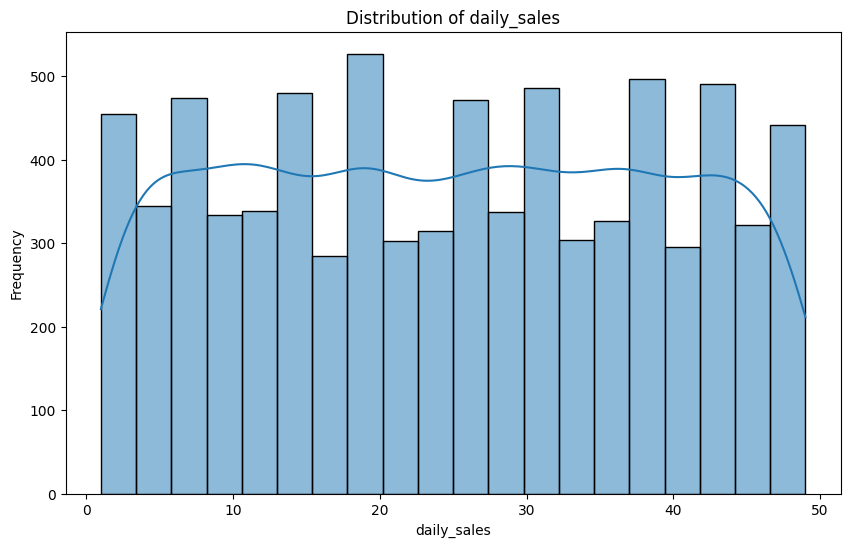

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dependent_variable = 'daily_sales'

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df[dependent_variable].dropna(), kde=True)
plt.title(f'Distribution of {dependent_variable}')
plt.xlabel(dependent_variable)
plt.ylabel('Frequency')
plt.show()


### Boxplot

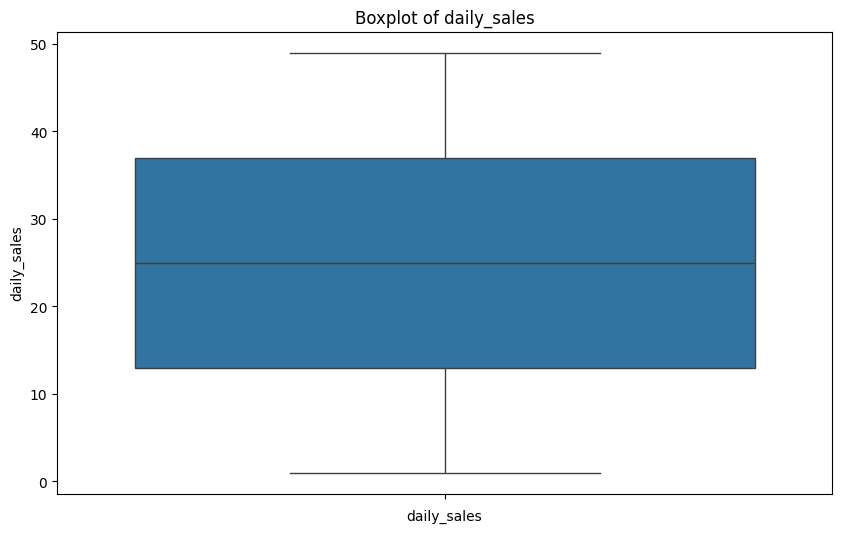

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(df[dependent_variable].dropna())
plt.title(f'Boxplot of {dependent_variable}')
plt.xlabel(dependent_variable)
plt.show()

### Correlation & Heatmap

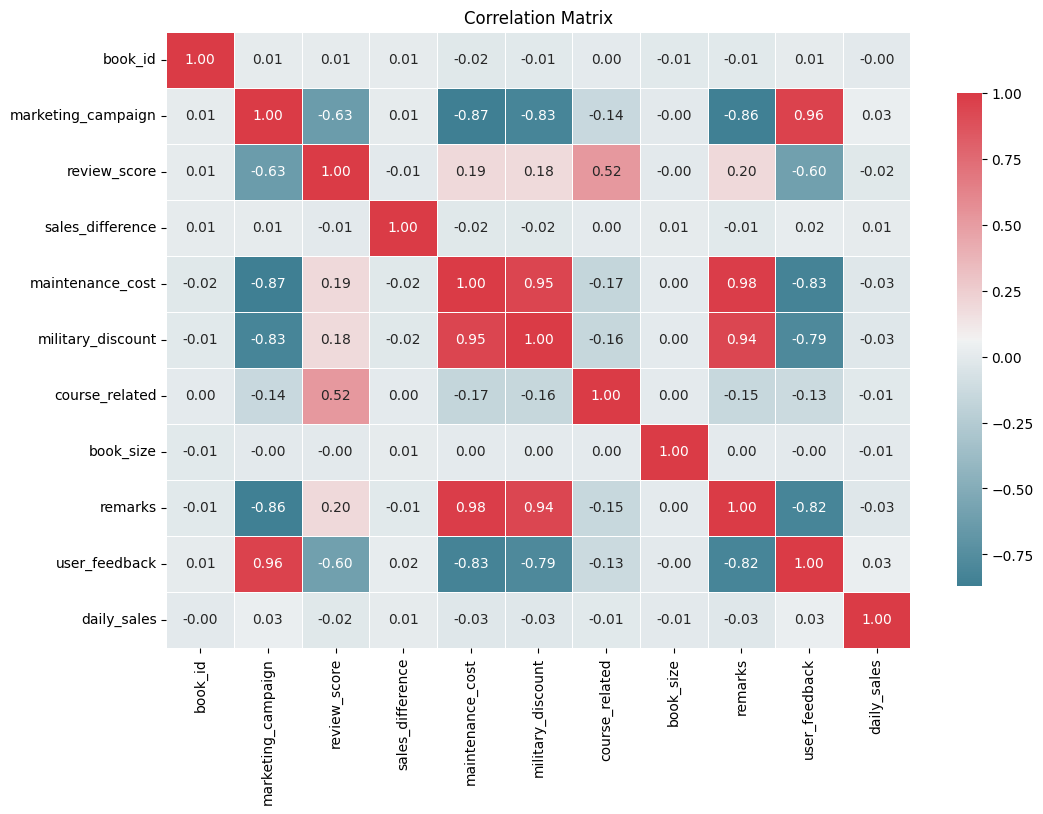

In [23]:
# Generate heatmap for correlation matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt='.2f',linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

### Encoding



1. **Binary Encoding**: Converting binary categorical variables to 0 and 1.
2. **One-Hot Encoding (OHE)**: Applying OHE to categorical variables with 3-5 unique labels.
3. **Label Encoding**: Applying Label encoding to categorical variables with more than 5 unique labels.  



In [24]:
# identify different data type groups before OHE
discrete = [var for var in df.columns if df[var].dtype !=
            'O'  and df[var].nunique() < 10]

continuous = [var for var in df.columns if df[var].dtype !=
              'O' and var not in discrete]

# categorical
categorical = [var for var in df.columns if df[var].dtype == 'O']

print(f'There are {len(discrete)} discrete variables. They are: {discrete}')
print(f'There are {len(continuous)} continuous variables. They are: {continuous}')
print(f'There are {len(categorical)} categorical variables. They are: {categorical}')

There are 2 discrete variables. They are: ['book_id', 'promotions']
There are 13 continuous variables. They are: ['marketing_campaign', 'review_score', 'CustomerDateOfBirth', 'sales_difference', 'maintenance_cost', 'zipcode', 'military_discount', 'course_related', 'book_size', 'remarks', 'user_feedback', 'daily_sales', 'date']
There are 7 categorical variables. They are: ['book_title', 'season', 'miscellaneous', 'StoreLocation', 'category', 'CustomerName', 'CustomerSurname']


In [25]:
# One-Hot Encoding for categorical columns
unique_value_counts = {col: df[col].nunique() for col in categorical}
print(unique_value_counts)

ohe_columns = [col for col, count in unique_value_counts.items() if 3 <= count <= 5]
df = pd.get_dummies(df, columns=ohe_columns, drop_first=True)

{'book_title': 5, 'season': 4, 'miscellaneous': 48, 'StoreLocation': 970, 'category': 971, 'CustomerName': 650, 'CustomerSurname': 963}


In [26]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Convert categorical columns to numerical values
label_encoders = {}
categorical_columns = ['miscellaneous', 'StoreLocation', 'zipcode', 'category']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

###Check for multicollinearity using the Variance Inflation Factor (VIF):

In [27]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all columns are numeric (assuming 'daily_sales' is your target variable)
vif_train = df.drop(['daily_sales'], axis=1).select_dtypes(include=np.number)

vif_data = [variance_inflation_factor(vif_train.values, i) for i in range(len(vif_train.columns))]

d = {'feature': vif_train.columns.values, 'vif': vif_data}
vif = pd.DataFrame(d)
vif

,feature,vif
0,book_id,5.594112
1,marketing_campaign,266.432319
2,miscellaneous,3.638418
3,review_score,21.287278
4,sales_difference,3.663354
5,maintenance_cost,314.196911
6,StoreLocation,3.566300
7,zipcode,3.669430
8,military_discount,52.343716
9,category,3.731822


In [28]:
hi_vif = []
for col in vif[vif['vif'] > 10]['feature']:
  hi_vif.append(col)

hi_vif

['marketing_campaign',
 'review_score',
 'maintenance_cost',
 'military_discount',
 'remarks',
 'user_feedback']

In [29]:
df.drop(hi_vif, axis=1, inplace=True)

## Modeling / Analytical Features

* Production level modeling should not be done in a notebook
* Use modular structured code
* Document

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                df.drop(['daily_sales'], axis=1),
                                df['daily_sales'],
                                test_size=0.25,
                                random_state=42)

X_train.shape, X_test.shape

((5868, 20), (1956, 20))

## Feature Selection

### Mutual Information

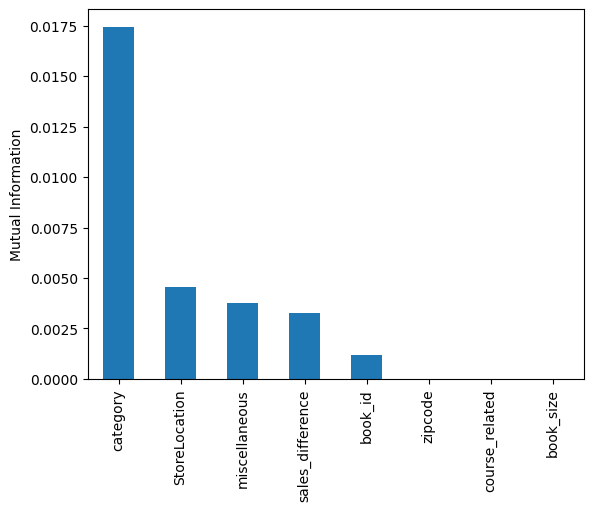

In [31]:
# obtain the mutual information values and select features
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile

mi_train = X_train.select_dtypes(include=['number']) # Select only numeric columns

mi = mutual_info_regression(mi_train, y_train)
mi = pd.Series(mi)
mi.index = mi_train.columns
mi.sort_values(ascending=False).plot.bar()
plt.ylabel('Mutual Information');

### Variance Threshold

In [32]:
from sklearn.feature_selection import VarianceThreshold

selections = VarianceThreshold(threshold=0.5)
selections.fit(mi_train)
vt_keepers = mi_train.columns.values[selections.get_support()]
print(vt_keepers)

['book_id' 'miscellaneous' 'StoreLocation' 'zipcode' 'category']


In [33]:
print(df.shape)
print(df.info())

(7824, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 7824 entries, 0 to 8185
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   book_id                                              7824 non-null   float64       
 1   miscellaneous                                        7824 non-null   int64         
 2   CustomerDateOfBirth                                  7824 non-null   datetime64[ns]
 3   sales_difference                                     7824 non-null   float64       
 4   StoreLocation                                        7824 non-null   int64         
 5   zipcode                                              7824 non-null   int64         
 6   promotions                                           7824 non-null   bool          
 7   category                                             7824 non-null   int64       

## Fine Tuning

* **Hyperparameter Optimization**:

Use techniques like grid search or random search to optimize model hyperparameters.

* **Cross-Validation**:

Employ cross-validation to ensure the model's robustness and avoid overfitting.
Evaluation Metrics:

* Use metrics like RMSE, MAE, and R-squared to evaluate model performance.

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Use ColumnTransformer to apply different transformers to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the final pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__fit_intercept': [True, False]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['book_id', 'miscellaneous', 'sales_difference', 'StoreLocation',
       'zipcode', 'category', 'course_related', 'book_size'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['CustomerName', 'CustomerSurname'], dtype='object'))])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

### Feature Engineering

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import xgboost as xgb
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA


# Feature engineering
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_month'] = df['date'].dt.day
df['year'] = df['date'].dt.year

# Drop the columns
df = df.drop(columns=['date', 'CustomerName', 'CustomerSurname', 'CustomerDateOfBirth'])

# Target variable
y = df['daily_sales']
X = df.drop(columns=['daily_sales'])

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Handle any missing values if needed
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)


## Model Comparisons

**Evaluate Models:**

Compare different models (e.g., ARIMA, Prophet, LSTM, XGBoost) based on their performance metrics.

**Visualization:**

Plot actual vs. predicted sales for each model.

**Selection:**

Choose the best-performing model based on evaluation metrics and business requirements.

### ARIMA MODEL

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import xgboost as xgb
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# ARIMA requires the target variable to be a time series
train_size = int(len(y) * 0.8)
train, test = y[0:train_size], y[train_size:len(y)]

# Fit ARIMA model
arima_model = ARIMA(train, order=(5,1,0))
arima_model_fit = arima_model.fit()

# Make predictions
arima_forecast = arima_model_fit.forecast(steps=len(test))
arima_rmse = sqrt(mean_squared_error(test, arima_forecast))
arima_mae = mean_absolute_error(test, arima_forecast)
arima_r2 = r2_score(test, arima_forecast)

print(f'ARIMA RMSE: {arima_rmse}, MAE: {arima_mae}, R^2: {arima_r2}')


ARIMA RMSE: 14.61360379683306, MAE: 12.476442196587575, R^2: -0.08941097142060417


### LSTM MODEL

In [37]:
# Reshape data for LSTM (samples, time steps, features)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(1, X_train.shape[1])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32)

# Make predictions
lstm_forecast = lstm_model.predict(X_test_lstm)
lstm_forecast = np.reshape(lstm_forecast, (lstm_forecast.shape[0],))
lstm_rmse = sqrt(mean_squared_error(y_test, lstm_forecast))
lstm_mae = mean_absolute_error(y_test, lstm_forecast)
lstm_r2 = r2_score(y_test, lstm_forecast)

print(f'LSTM RMSE: {lstm_rmse}, MAE: {lstm_mae}, R^2: {lstm_r2}')


Epoch 1/20
196/196 [==============================] - 6s 5ms/step - loss: 620.1008
Epoch 2/20
196/196 [==============================] - 1s 4ms/step - loss: 226.4805
Epoch 3/20
196/196 [==============================] - 1s 4ms/step - loss: 199.3260
Epoch 4/20
196/196 [==============================] - 1s 4ms/step - loss: 197.8990
Epoch 5/20
196/196 [==============================] - 1s 4ms/step - loss: 197.6500
Epoch 6/20
196/196 [==============================] - 1s 7ms/step - loss: 197.4526
Epoch 7/20
196/196 [==============================] - 1s 5ms/step - loss: 197.1659
Epoch 8/20
196/196 [==============================] - 1s 4ms/step - loss: 196.9500
Epoch 9/20
196/196 [==============================] - 1s 4ms/step - loss: 196.5131
Epoch 10/20
196/196 [==============================] - 1s 5ms/step - loss: 196.1253
Epoch 11/20
196/196 [==============================] - 1s 5ms/step - loss: 195.4664
Epoch 12/20
196/196 [==============================] - 2s 8ms/step - loss: 194.6667
E

### XGBoost MODEL

In [38]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', enable_categorical=True),
                           param_grid=param_grid, scoring='r2', cv=3, verbose=1)

grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_

# Make predictions with the best model
xgb_forecast = best_xgb_model.predict(X_test)

# Evaluate the model
xgb_rmse = round(sqrt(mean_squared_error(y_test, xgb_forecast)),2)
xgb_mae = round(mean_absolute_error(y_test, xgb_forecast),2)
xgb_r2 = round(r2_score(y_test, xgb_forecast), 6)


print(f'Best XGBoost RMSE: {xgb_rmse}, MAE: {xgb_mae}, R^2: {xgb_r2}')


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best XGBoost RMSE: 14.0, MAE: 12.12, R^2: 0.000592


### Model Comparision

In [39]:
# Summarize the performance metrics
models = ['ARIMA', 'LSTM', 'XGBoost']
rmse_values = [arima_rmse,  lstm_rmse, xgb_rmse]
mae_values = [arima_mae,  lstm_mae, xgb_mae]
r2_values = [arima_r2, lstm_r2, xgb_r2]

comparison_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R^2': r2_values
})

print(comparison_df)


     Model       RMSE        MAE       R^2
0    ARIMA  14.613604  12.476442 -0.089411
1     LSTM  14.264900  12.267638 -0.038041
2  XGBoost  14.000000  12.120000  0.000592


## Visualizations

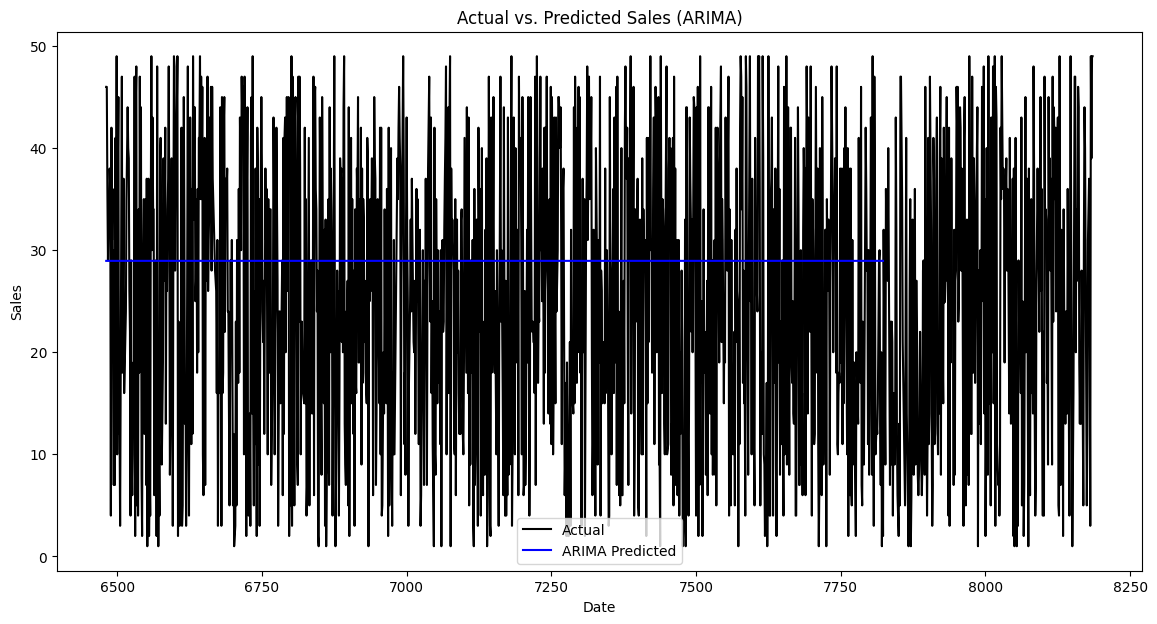

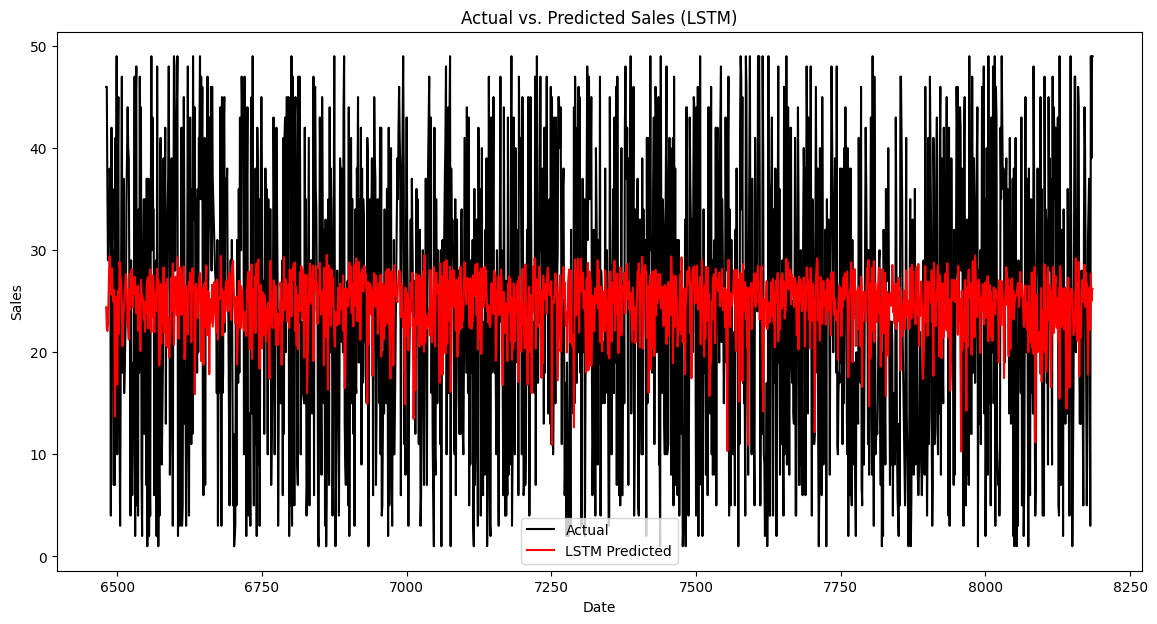

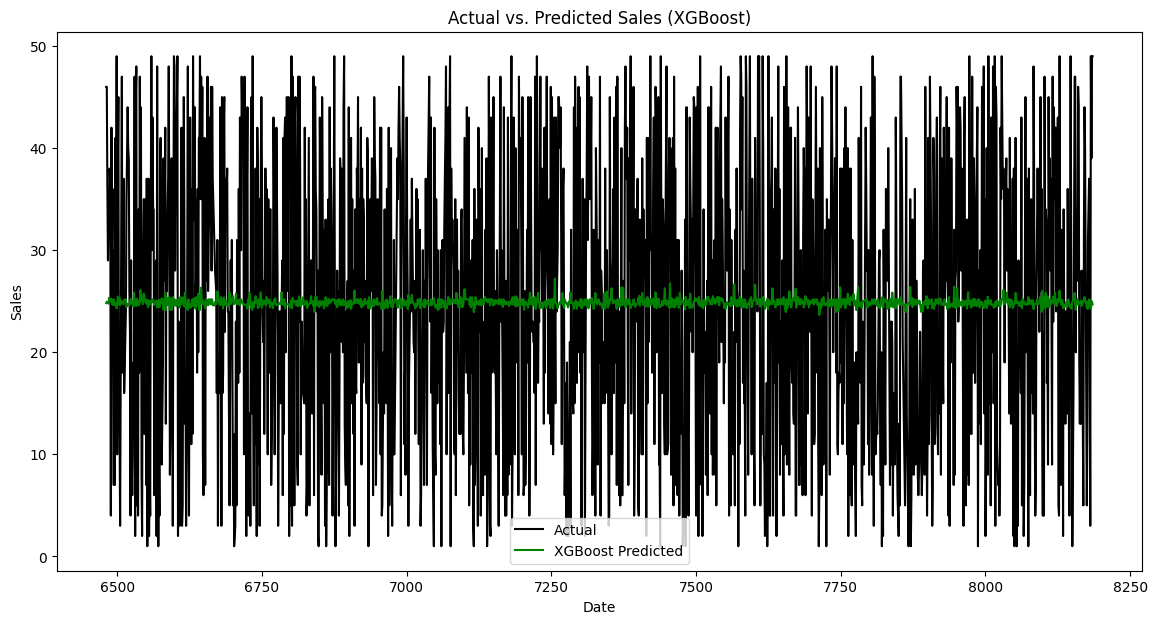

In [40]:
import matplotlib.pyplot as plt

y_test_aligned, arima_forecast_aligned = y_test.align(arima_forecast, join='inner')

lstm_forecast_series = pd.Series(lstm_forecast, index=y_test.index)
y_test_aligned, lstm_forecast_aligned = y_test.align(lstm_forecast_series, join='inner')

y_test_aligned, xgb_forecast_aligned = y_test.align(pd.Series(xgb_forecast, index=y_test.index), join='inner')

# Create a DataFrame for easy plotting
results_df = pd.DataFrame({
    'Date': y_test_aligned.index,
    'Actual': y_test_aligned,
    'ARIMA_Predicted': arima_forecast_aligned,
    'LSTM_Predicted': lstm_forecast_aligned,
    'XGBoost_Predicted': xgb_forecast_aligned
})

# Plot Actual vs. Predicted sales for ARIMA
plt.figure(figsize=(14, 7))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual', color='black')
plt.plot(results_df['Date'], results_df['ARIMA_Predicted'], label='ARIMA Predicted', color='blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales (ARIMA)')
plt.legend()
plt.show()

# Plot Actual vs. Predicted sales for LSTM
plt.figure(figsize=(14, 7))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual', color='black')
plt.plot(results_df['Date'], results_df['LSTM_Predicted'], label='LSTM Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales (LSTM)')
plt.legend()
plt.show()

# Plot Actual vs. Predicted sales for XGBoost
plt.figure(figsize=(14, 7))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual', color='black')
plt.plot(results_df['Date'], results_df['XGBoost_Predicted'], label='XGBoost Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales (XGBoost)')
plt.legend()
plt.show()


# DATABASE

In [71]:
import sqlite3

connection = sqlite3.connect('SPSN.db') # creates / connects to db
cursor = connection.cursor()

In [72]:
# df to sql
df.to_sql('sales_forecasting', connection, if_exists='replace')

7824

### Adding rest of the team's data

In [73]:
customer_reviews=pd.read_csv('https://drive.google.com/uc?export=download&id=1-1br1rQOAkCxe7RmYPsfYUtoeWVFKY6u')
customer_reviews.to_sql('customer_reviews', connection, if_exists='replace', index=False)

file_id = '1FM7Zp-6HAn0FOWUlPKdA1c4X2Ttp5edY'
customer_churn_url = f'https://drive.google.com/uc?id={file_id}'
customer_churn = pd.read_csv(customer_churn_url)
customer_churn.to_sql('customer_churn', connection, if_exists='replace', index=False)

file_id = '1-31AYBrvwaTssaEKrsWrAq-2voB1sVFG'
customer_retention_url = f'https://drive.google.com/uc?export=download&id={file_id}'
customer_retention = pd.read_csv(customer_retention_url)
customer_retention.to_sql('customer_retention', connection, if_exists='replace', index=False)

file_id = '1-5XLM9mc8jN-Vo79sm74Cq6aJg47t6If'
sales_forecasting_url = f'https://drive.google.com/uc?export=download&id={file_id}'
sales_forecasting = pd.read_csv(sales_forecasting_url)
sales_forecasting.to_sql('sales_forecasting', connection, if_exists='replace', index=False)


10021

In [74]:
# Query to read data from the table
query = "SELECT * FROM sales_forcasting"
cursor.execute(query)
cursor.fetchall()

# Load data into a pandas DataFrame
df = pd.read_sql(query, connection)

# Check the first few rows of the DataFrame
print(df.shape)
print(df.head())


(7824, 22)
   index  book_id  miscellaneous  sales_difference  StoreLocation  zipcode  \
0      0   1389.0             23          0.495274            271     3666   
1      1   8416.0             28          0.546382            613     2649   
2      2   8976.0             13          0.847777            790     6530   
3      3   8976.0             14          0.445567            498     4040   
4      4   8976.0             16          0.332650            575     1135   

   promotions  category  course_related  book_size  ...  \
0           0       189        1.065697  -2.085030  ...   
1           1       714        1.069669  -0.517485  ...   
2           1       311        1.366969  -0.491587  ...   
3           0       443        0.759074  -0.348775  ...   
4           0       112        1.951595  -0.919811  ...   

   book_title_Itself education rate.  book_title_Must summer happen key.  \
0                                  1                                   0   
1            

In [75]:
query = '''
SELECT * FROM sales_forcasting LIMIT 3;
'''
cursor.execute(query)
cursor.fetchall()

[(0,
  1389.0,
  23,
  0.4952742911436716,
  271,
  3666,
  0,
  189,
  1.0656974559516847,
  -2.0850296762606915,
  39.0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  4,
  6,
  4,
  2021),
 (1,
  8416.0,
  28,
  0.5463819572935941,
  613,
  2649,
  1,
  714,
  1.069668582965289,
  -0.5174849028804415,
  48.0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  10,
  6,
  30,
  2022),
 (2,
  8976.0,
  13,
  0.8477771665749864,
  790,
  6530,
  1,
  311,
  1.3669691209370325,
  -0.4915865075904735,
  4.0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  6,
  1,
  13,
  2023)]

In [76]:
# get our table information
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
rows = cursor.fetchall()
table_names =  ", ".join(row[0] for row in rows if row[0] is not None)
print(table_names)

for table in table_names.split(', '):
  print(f"Table: {table}")
  cursor.execute(f"SELECT sql FROM sqlite_schema WHERE name = '{table}';")
  schema = cursor.fetchall()
  for col in schema:
    print(col[0])

  print()

sales_forcasting, sales_forecasting, customer_reviews, customer_churn, customer_retention
Table: sales_forcasting
CREATE TABLE "sales_forcasting" (
"index" INTEGER,
  "book_id" REAL,
  "miscellaneous" INTEGER,
  "sales_difference" REAL,
  "StoreLocation" INTEGER,
  "zipcode" INTEGER,
  "promotions" INTEGER,
  "category" INTEGER,
  "course_related" REAL,
  "book_size" REAL,
  "daily_sales" REAL,
  "book_title_Interview institution economy lot never." INTEGER,
  "book_title_Itself education rate." INTEGER,
  "book_title_Must summer happen key." INTEGER,
  "book_title_Success rich eye." INTEGER,
  "season_Spring" INTEGER,
  "season_Summer" INTEGER,
  "season_Winter" INTEGER,
  "month" INTEGER,
  "day_of_week" INTEGER,
  "day_of_month" INTEGER,
  "year" INTEGER
)

Table: sales_forecasting
CREATE TABLE "sales_forecasting" (
"level_0" INTEGER,
  "index" INTEGER,
  "book_id" REAL,
  "miscellaneous" INTEGER,
  "sales_difference" REAL,
  "StoreLocation" INTEGER,
  "zipcode" INTEGER,
  "promotio

### Assessment and Usefulness

## Conclusion


The comparative analysis of ARIMA, LSTM, and XGBoost models for sales forecasting indicates that the XGBoost model performs the best, with the lowest RMSE (14.000) and MAE (12.120), and the only positive R² value (0.000592), although minimal. The ARIMA and LSTM models underperformed, exhibiting higher error metrics and negative R² values. Implementing the XGBoost model can enhance sales forecasting accuracy, leading to more efficient inventory management and targeted marketing strategies. Future improvements should focus on hyperparameter tuning, advanced feature engineering, and data enrichment with additional relevant variables to further boost the model's predictive capabilities.

### Summary of Findings

Given the results, the XGBoost model is the preferred choice for sales forecasting in this scenario due to its superior performance in terms of RMSE, MAE, and R² compared to ARIMA and LSTM models.

By selecting the XGBoost model, we can enhance the accuracy of sales forecasts, ultimately leading to better inventory management and marketing strategies.








### Additional Information

### Strengths and Weaknesses

* **Strengths**

  * Comprehensive Data Analysis:

Our project covers a broad spectrum of the business, from sales forecasting to customer sentiment analysis and employee retention. This holistic approach ensures that we capture all critical factors influencing the bookstore's performance. By integrating data from various sources and departments, we can derive actionable insights that support strategic decision-making across the organization.

  * Robust Forecasting Models:

The implementation of advanced forecasting models, such as ARIMA, LSTM, and XGBoost, has provided us with a powerful toolkit for predicting future sales trends. These models have been fine-tuned to handle the unique characteristics of our sales data, such as seasonality and promotional effects. The results have shown that XGBoost, in particular, has a slight edge in performance metrics, providing us with reliable forecasts to optimize inventory management and marketing campaigns.

* **Weaknesses**

  * Limitation: Potential Overfitting:

Some of the more complex models, like LSTM and XGBoost, come with the risk of overfitting, particularly if not properly tuned. Overfitting can lead to models that perform exceptionally well on historical data but poorly on unseen data. This risk necessitates rigorous cross-validation and regular model retraining with new data to ensure continued accuracy and generalizability.

  * Trust in Statistics:
  
To build trust in our findings, transparency in our data processing and model validation processes is crucial. This includes clearly documenting how data is cleaned, how features are selected and engineered, and how models are trained and evaluated. Providing detailed reports and visualizations of model performance helps stakeholders understand and trust the results. Ensuring reproducibility of the analysis by maintaining version-controlled code and data pipelines further enhances credibility.

## Going Forward

* Since this is AB testing, usually a test between means, talk about linear regression and its benefits

A/B testing often involves comparing the means of two groups to determine if a new feature or treatment leads to a significant improvement over the control. Linear regression can enhance A/B testing by allowing us to control for confounding variables, ensuring a more accurate comparison. In the context of our project, implementing linear regression can help isolate the effect of specific features (such as new promotional strategies or seasonal changes) on sales. This method provides a clear quantification of the relationship between these features and the target variable, offering insights that simple mean comparisons might overlook. By including linear regression in our analytical toolkit, we can better understand the nuances of our data, leading to more informed business decisions and optimized marketing strategies.



* How are we addressing current trends and breakthroughs

In our sales forecasting project, staying attuned to current trends and breakthroughs is essential for maintaining a competitive edge. We've incorporated advanced machine learning models like LSTM and XGBoost, which are well-regarded for their ability to capture complex patterns and relationships in time series data. Additionally, our use of feature engineering techniques ensures that our models are equipped with relevant and meaningful input variables, enhancing their predictive power. By continually updating our models with the latest data and refining our feature set, we can adapt to evolving market conditions and consumer behaviors. This proactive approach enables us to leverage state-of-the-art methodologies, ensuring our forecasts remain accurate and our business strategies are data-driven and responsive to the latest industry developments.






